# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st 
from scipy.stats import linregress

# Import API key
# enter user's key into api_key file
from api_keys import weather_api_key
if weather_api_key == "YOUR KEY HERE!":
    import sys
    path = "/Users/matth/Desktop"
    sys.path.insert(0, path)
    from API_Keys import api_key
    weather_api_key= api_key["https://openweathermap.org/"]

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#import pretty print
import pprint as pprint

#for date title in plots and filenames
from datetime import datetime

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?" 
#build url with a few other params, api key, and units imperial for temp in F and windspeed in mph.
query_url = base_url + "appid=" + weather_api_key +"&units=imperial&q="

In [4]:
#set min number of cities needed
citymin = 500



# initialize lists for data storage
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []
Lat=[]
Long=[]
# include a list of cities that error out.
city_not_found=[]
#initialize count how many cities we've found weather data for.
citycount=0
#check if we have enough cities, if not, abort. if so, proceed to for loop.
if len(cities)<citymin:
    print("-----------------------------")
    print(f"Data Retrieval Aborted.")
    print(f"Rerun Generate Cities List to ensure >{citymin} cities.")
    print("-----------------------------")
else:
    print("Beginning Data Retrieval")     
    print("-----------------------------")
    #begin for loop to store records for each city
    for city in cities:
        try:
            city_url = query_url + city
            response = requests.get(city_url).json()
            # Add a one second interval between queries to (hopefully) stay within API query limits
            time.sleep(.5)
            # Use response to generate lists.
            Max_Temp.append(response["main"]["temp_max"]) 
            Humidity.append(response["main"]["humidity"])
            Cloudiness.append(response["clouds"]["all"])
            Wind_Speed.append(response["wind"]["speed"])
            Country.append(response["sys"]["country"])
            Date.append(response["dt"])
            Lat.append(response["coord"]["lat"])
            Long.append(response["coord"]["lon"])
            citycount=citycount+1
            print(f"processing record number {citycount} for | {city}")
        except:
            print(f"City: {city} not found. Marking as NaN...")
            Max_Temp.append(float("NaN")) 
            Humidity.append(float("NaN"))
            Cloudiness.append(float("NaN"))
            Wind_Speed.append(float("NaN"))
            Country.append(float("NaN"))
            Date.append(float("NaN"))
            Lat.append(float("NaN"))
            Long.append(float("NaN"))
            city_not_found.append(city)
    #end for loop, print summary.      
    print("-----------------------------")
    print("Data Retrieval Complete")  
    print(f"Records for {citycount} cities created.")
    print(f"{len(city_not_found)} cities not found and skipped. See list: city_not_found for details.")
    print("-----------------------------")
    if citycount<citymin:
        print(f"Warning: Though more than {citymin} cities were input,")
        print(f"only {citycount} cities have corresponding weather data.")
        print(f"Consider reruning from Generate Cities to boost count.")
# clears api keys after use.
weather_api_key=[]
query_url=[]
city_url=[]

Beginning Data Retrieval
-----------------------------
processing record number 1 for | xai-xai
processing record number 2 for | gorgan
processing record number 3 for | tuatapere
processing record number 4 for | mataura
processing record number 5 for | bambanglipuro
processing record number 6 for | kapaa
processing record number 7 for | punta arenas
processing record number 8 for | vaini
processing record number 9 for | hermanus
processing record number 10 for | jamestown
processing record number 11 for | sioux lookout
City: taolanaro not found. Marking as NaN...
processing record number 12 for | albany
processing record number 13 for | zdvinsk
processing record number 14 for | baykit
processing record number 15 for | nantucket
processing record number 16 for | puerto ayora
processing record number 17 for | kruisfontein
processing record number 18 for | tazmalt
processing record number 19 for | rikitea
processing record number 20 for | khatanga
processing record number 21 for | mushie


processing record number 177 for | preobrazheniye
processing record number 178 for | praia
processing record number 179 for | elat
processing record number 180 for | arraial do cabo
processing record number 181 for | xichang
processing record number 182 for | san quintin
processing record number 183 for | along
processing record number 184 for | luderitz
City: kuche not found. Marking as NaN...
processing record number 185 for | poum
processing record number 186 for | rio grande
processing record number 187 for | barrow
processing record number 188 for | algete
processing record number 189 for | forio
processing record number 190 for | phalaborwa
processing record number 191 for | lalmohan
processing record number 192 for | basak
processing record number 193 for | georgetown
processing record number 194 for | kirakira
processing record number 195 for | lokosovo
City: marcona not found. Marking as NaN...
processing record number 196 for | hermiston
processing record number 197 for | hai

processing record number 338 for | iranshahr
processing record number 339 for | srednekolymsk
processing record number 340 for | show low
processing record number 341 for | kstovo
processing record number 342 for | richards bay
processing record number 343 for | lasa
processing record number 344 for | katsuura
processing record number 345 for | kokopo
processing record number 346 for | mogocha
processing record number 347 for | manono
processing record number 348 for | nishihara
processing record number 349 for | faya
processing record number 350 for | amapa
processing record number 351 for | narsaq
processing record number 352 for | sironj
processing record number 353 for | kutum
processing record number 354 for | kaseda
processing record number 355 for | aviles
processing record number 356 for | nouadhibou
processing record number 357 for | kizema
processing record number 358 for | murgab
processing record number 359 for | beringovskiy
processing record number 360 for | lincoln
proce

processing record number 512 for | mizdah
processing record number 513 for | kampot
processing record number 514 for | molteno
processing record number 515 for | lugo
processing record number 516 for | paracuru
City: phan rang not found. Marking as NaN...
City: ondorhaan not found. Marking as NaN...
processing record number 517 for | siniscola
processing record number 518 for | asau
processing record number 519 for | zhangye
processing record number 520 for | norman wells
processing record number 521 for | newport
processing record number 522 for | huarmey
processing record number 523 for | bermeo
processing record number 524 for | nalut
processing record number 525 for | malamig
City: toliary not found. Marking as NaN...
processing record number 526 for | dickinson
processing record number 527 for | swinoujscie
processing record number 528 for | vanavara
processing record number 529 for | los llanos de aridane
processing record number 530 for | black river
processing record number 531

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_city= {"City": cities,
               "Lat": Lat,
               "Lng": Long,
               "Max Temp": Max_Temp,
               "Humidity": Humidity,
               "Cloudiness": Cloudiness,
               "Wind Speed": Wind_Speed,
               "Country": Country,
               "Date": Date}
# this line drops any cities that could not be found, which were marked as NaN
# reset the index so it matches row number.
weather_city_df = pd.DataFrame(weather_city).dropna(how="any").reset_index(drop=True)
# view the dataframe, able to confirm row counts against the printout above.
weather_city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xai-xai,-25.0519,33.6442,74.34,88.0,0.0,7.56,MZ,1.615588e+09
1,gorgan,36.8387,54.4348,39.20,93.0,90.0,25.32,IR,1.615588e+09
2,tuatapere,-46.1333,167.6833,59.00,82.0,1.0,3.00,NZ,1.615588e+09
3,mataura,-46.1927,168.8643,59.00,82.0,1.0,3.00,NZ,1.615588e+09
4,bambanglipuro,-7.9500,110.2833,75.94,85.0,86.0,3.65,ID,1.615588e+09
...,...,...,...,...,...,...,...,...,...
562,the valley,18.2170,-63.0578,78.80,69.0,20.0,8.05,AI,1.615588e+09
563,otjimbingwe,-22.3500,16.1333,72.57,32.0,11.0,0.20,NA,1.615588e+09
564,kaeo,-35.1000,173.7833,73.00,73.0,36.0,8.99,NZ,1.615588e+09
565,petropavlovsk-kamchatskiy,53.0452,158.6483,21.20,42.0,63.0,15.66,RU,1.615588e+09


In [6]:
city_not_found

['taolanaro',
 'paucartambo',
 'saryshagan',
 'grand river south east',
 'belushya guba',
 'barentsburg',
 'marv dasht',
 'ituni',
 'temaraia',
 'attawapiskat',
 'kuche',
 'marcona',
 'koboldo',
 'ruatoria',
 'saleaula',
 'palabuhanratu',
 'tabiauea',
 'nizhneyansk',
 'rungata',
 'ijaki',
 'tumannyy',
 'amderma',
 'barbar',
 'safwah',
 'samalaeulu',
 'mys shmidta',
 'tsihombe',
 'illoqqortoormiut',
 'kamenskoye',
 'karaul',
 'lolua',
 'yirol',
 'sorvag',
 'tlaxiaco',
 'jaipur hat',
 'paradwip',
 'yurya',
 'malwan',
 'sahrak',
 'barroualie',
 'burica',
 'bolshiye kaybitsy',
 'el faiyum',
 'utiroa',
 'samusu',
 'bur gabo',
 'satitoa',
 'warqla',
 'phan rang',
 'ondorhaan',
 'toliary',
 'umzimvubu',
 'nabul',
 'kazalinsk']

In [7]:
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

weather_city_df_agg=pd.DataFrame({"count": weather_city_df[col_list].count(),
                                  "mean": weather_city_df[col_list].mean(),
                                  "std": weather_city_df[col_list].std(),
                                  "min": weather_city_df[col_list].min(),
                                  "25%": weather_city_df[col_list].quantile(q=0.25).tolist(),
                                  "50%": weather_city_df[col_list].quantile(q=0.5).tolist(),
                                  "75%": weather_city_df[col_list].quantile(q=0.75).tolist(),
                                  "max": weather_city_df[col_list].max()}).T
weather_city_df_agg

# can also be done with .describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.756293,20.483708,55.054321,71.929453,48.987654,8.745115,1.615588e+09
std,32.066291,89.078626,26.774385,20.869322,38.817479,6.357159,1.470189e+02
min,-54.800000,-179.166700,-23.980000,11.000000,0.000000,0.160000,1.615588e+09
25%,-3.925200,-52.840700,39.595000,62.000000,5.000000,3.440000,1.615588e+09
50%,25.383300,23.433300,63.280000,76.000000,41.000000,7.090000,1.615588e+09
75%,46.577750,98.648300,76.975000,88.000000,90.000000,12.535000,1.615588e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,35.680000,1.615588e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
index_bool = weather_city_df["Humidity"]>100
index_hum_over100 = [i for i in range(len(index_bool)-1) if index_bool[i]==True]
index_hum_over100 

[]

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# did not need to pass inplace. The method below preserves the data eitherway and passes clean_city_data for future work.
if len(index_hum_over100) > 0:
    clean_city_data = weather_city_df.drop(index_hum_over100).reset_index(drop=True)
else:
    clean_city_data = weather_city_df
clean_city_data.to_csv('../' + output_data_file)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,xai-xai,-25.0519,33.6442,74.34,88.0,0.0,7.56,MZ,1.615588e+09
1,gorgan,36.8387,54.4348,39.20,93.0,90.0,25.32,IR,1.615588e+09
2,tuatapere,-46.1333,167.6833,59.00,82.0,1.0,3.00,NZ,1.615588e+09
3,mataura,-46.1927,168.8643,59.00,82.0,1.0,3.00,NZ,1.615588e+09
4,bambanglipuro,-7.9500,110.2833,75.94,85.0,86.0,3.65,ID,1.615588e+09
...,...,...,...,...,...,...,...,...,...
562,the valley,18.2170,-63.0578,78.80,69.0,20.0,8.05,AI,1.615588e+09
563,otjimbingwe,-22.3500,16.1333,72.57,32.0,11.0,0.20,NA,1.615588e+09
564,kaeo,-35.1000,173.7833,73.00,73.0,36.0,8.99,NZ,1.615588e+09
565,petropavlovsk-kamchatskiy,53.0452,158.6483,21.20,42.0,63.0,15.66,RU,1.615588e+09


In [10]:
#Statistics Summary Table for clean_city_data
#create dataframe with count, mean, std, min, 25th percentile, 50th percentile, 75th percentile, and max.
col_list=["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Date"]

clean_city_data_agg=pd.DataFrame({"count": clean_city_data[col_list].count(),
                                  "mean": clean_city_data[col_list].mean(),
                                  "std": clean_city_data[col_list].std(),
                                  "min": clean_city_data[col_list].min(),
                                  "25%": clean_city_data[col_list].quantile(q=0.25).tolist(),
                                  "50%": clean_city_data[col_list].quantile(q=0.5).tolist(),
                                  "75%": clean_city_data[col_list].quantile(q=0.75).tolist(),
                                  "max": clean_city_data[col_list].max()}).T
clean_city_data_agg

#can also be done with describe.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,20.756293,20.483708,55.054321,71.929453,48.987654,8.745115,1.615588e+09
std,32.066291,89.078626,26.774385,20.869322,38.817479,6.357159,1.470189e+02
min,-54.800000,-179.166700,-23.980000,11.000000,0.000000,0.160000,1.615588e+09
25%,-3.925200,-52.840700,39.595000,62.000000,5.000000,3.440000,1.615588e+09
50%,25.383300,23.433300,63.280000,76.000000,41.000000,7.090000,1.615588e+09
75%,46.577750,98.648300,76.975000,88.000000,90.000000,12.535000,1.615588e+09
max,78.218600,179.316700,91.400000,100.000000,100.000000,35.680000,1.615588e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
plt.style.use('ggplot')

In [26]:
# Define a function that takes in the column heading titles for the choice of measurements from the data frames.
# The function will create a labeled scatter plot with interpretation. 
def Weather_Scatter(x_val,y_val):
    colx = x_val
    coly = y_val

    # set up x, y and title for plot
    x=clean_city_data[colx]
    y=clean_city_data[coly]
    plot_title = colx +" vs. " + coly

    #plot setup
    plt.scatter(x,y)
    plt.xlabel(colx)
    plt.ylabel(coly)
    plt.title(plot_title + " "+ datetime.today().strftime("%m/%d/%y"))

    #Save as png in output data folder with date and timestampe
    plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

    #Explanation
    print(f"This plot examines and displays the relationship between {colx} and {coly} for the clean_city_data.")
    print(f"Questions to ask might include: As {colx} increases/decreases, what happens to {coly}? Does it increase/decrease?")

This plot examines and displays the relationship between Lat and Max Temp for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Max Temp? Does it increase/decrease?


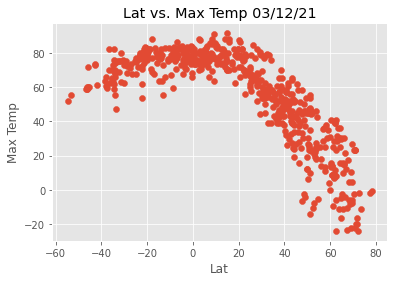

In [23]:
Weather_Scatter("Lat","Max Temp")

## Latitude vs. Humidity Plot

This plot examines and displays the relationship between Lat and Humidity for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Humidity? Does it increase/decrease?


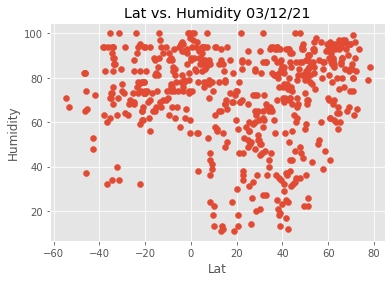

In [27]:
Weather_Scatter("Lat", "Humidity")

## Latitude vs. Cloudiness Plot

This plot examines and displays the relationship between Lat and Cloudiness for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Cloudiness? Does it increase/decrease?


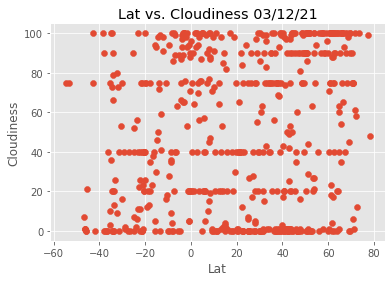

In [28]:
Weather_Scatter("Lat", "Cloudiness")

## Latitude vs. Wind Speed Plot

This plot examines and displays the relationship between Lat and Wind Speed for the clean_city_data.
Questions to ask might include: As Lat increases/decreases, what happens to Wind Speed? Does it increase/decrease?


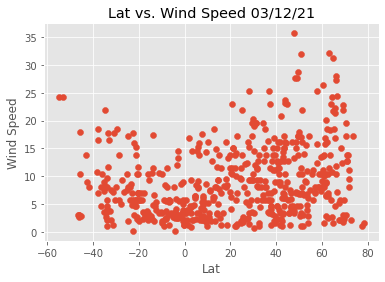

In [29]:
Weather_Scatter("Lat", "Wind Speed")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [103]:
def Hemisphere_Analysis(x_val, y_val):

    colx = x_val
    coly = y_val

    #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
    correlation_dic = {}
    slope_dic = {}

    # subplots takes rows, columns for how many subplots
    #figsize default is 6.4 and 4.8
    fig = plt.figure(figsize=(6,12))
    # for good picture of referring to subplots use 
    #https://stackoverflow.com/questions/3584805/in-matplotlib-what-does-the-argument-mean-in-fig-add-subplot111
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212)
 
    for (hemisphere, ax) in  [("Northern", ax1), ("Southern",ax2)]:
        if hemisphere == "Northern":
            logical_hem = clean_city_data["Lat"]>=0
        elif hemisphere == "Southern":
            logical_hem = clean_city_data["Lat"]<=0
        
        #Set up x and y for the scatter plot using params above.
        x=clean_city_data[logical_hem][colx]
        y=clean_city_data[logical_hem][coly]
        
        #Set up title automatically. Also helps very the right data is being grabbed.
        plot_title = hemisphere + "Hemisphere - " + colx +" vs. " + coly

        #linreg (with plot equation)
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
        regress_values = slope*x + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        #plot linreg with equation
        ax.plot(x,regress_values,"r-")
        # dynamic placement for annotation based on the line. Always above the data. 
        ax.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
        ax.set_ylim(y.min(),y.max()+30)
        #plot setup
        ax.scatter(x,y,color="blue",alpha=0.5)
        ax.set_xlabel(colx)
        ax.set_ylabel(coly)
        ax.set_title(plot_title + datetime.today().strftime("%m/%d/%y"))

        #Save as png in output data folder with date and timestampe
        plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

        #Correlation
        correlation_dic[hemisphere] = round(st.pearsonr(x,y)[0],2)
        slope_dic[hemisphere]=slope
    
    behavior=[]
    slope_list = [slope_dic["Northern"], slope_dic["Southern"]]
    for slope in slope_list:
        if slope>0:
            behavior.append("increases")
        elif slope == 0:
            behavior.append("does not change")
        elif slope < 0:
            behavior.append("decreases")


    corr_list = [correlation_dic["Northern"], correlation_dic["Southern"]]
    strength=[]
    for corr in corr_list:
        if 0< abs(corr) <.39:
            strength.append("weak")
        elif .4<abs(corr)<.65: 
                strength.append("moderate")
        elif .65<abs(corr)<1:
                strength.append("strong")
        
    print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
    print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
    print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_dic['Northern']} which is {strength[0]}.")
    print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_dic['Southern']} which is {strength[1]}.")        

For the northern hemisphere, as Lat increases, Max Temp decreases.
For the southern hemisphere, as Lat increases, Max Temp increases.
The correlation for Lat vs. Max Temp in the Northern Hemisphere is -0.88 which is strong.
The correlation for Lat vs. Max Temp in the Southern Hemisphere is 0.55 which is moderate.


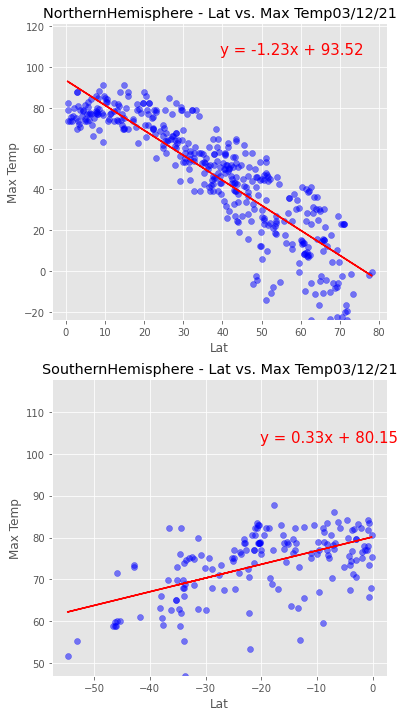

In [104]:
Hemisphere_Analysis("Lat", "Max Temp")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

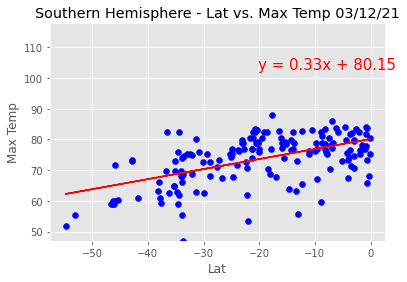

In [18]:
colx = "Lat"
coly = "Max Temp"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [19]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

For the northern hemisphere, as Lat increases, Max Temp decreases.
For the southern hemisphere, as Lat increases, Max Temp increases.
The correlation for Lat vs. Max Temp in the Northern Hemisphere is -0.88 which is strong.
The correlation for Lat vs. Max Temp in the Southern Hemisphere is 0.55 which is moderate.


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

For the northern hemisphere, as Lat increases, Humidity increases.
For the southern hemisphere, as Lat increases, Humidity increases.
The correlation for Lat vs. Humidity in the Northern Hemisphere is 0.18 which is weak.
The correlation for Lat vs. Humidity in the Southern Hemisphere is 0.24 which is weak.
['weak', 'weak']


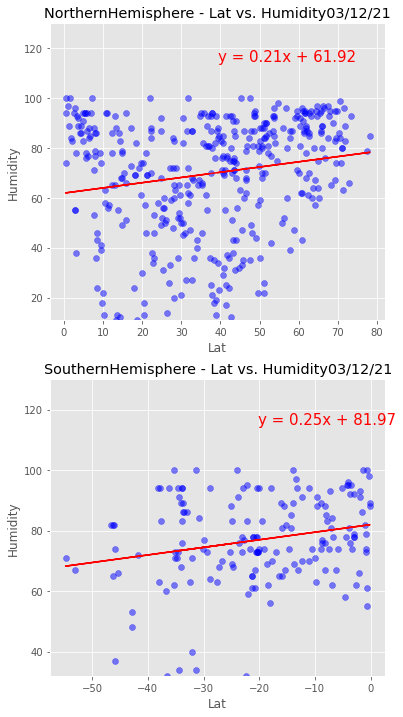

In [102]:
Hemisphere_Analysis("Lat", "Humidity")

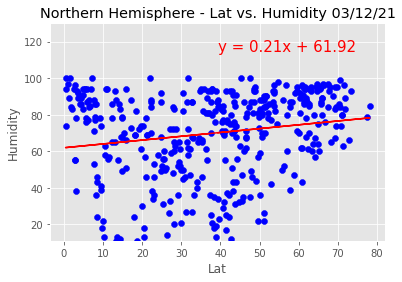

In [82]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min(),y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

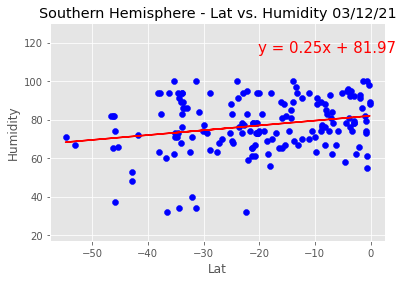

In [88]:
colx = "Lat"
coly = "Humidity"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [ ]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [ ]:
colx = "Lat"
coly = "Cloudiness"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)


#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [ ]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]>=0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_N = round(st.pearsonr(x,y)[0],2)
slope_N=slope

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:
colx = "Lat"
coly = "Wind Speed"
#filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
logical_hem = clean_city_data["Lat"]<0

#Set up x and y for the scatter plot using params above.
x=clean_city_data[logical_hem][colx]
y=clean_city_data[logical_hem][coly]
plot_title = colx +" vs. " + coly

#Set up title automatically. Also helps very the right data is being grabbed.
if min(x)>0:
    title_hem  = "Northern Hemisphere - "
else:
    title_hem = "Southern Hemisphere - "
plot_title = title_hem + colx +" vs. " + coly
    
#linreg (with plot equation)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
regress_values = slope*x + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x,regress_values,"r-")
# dynamic placement for annotation based on the line. Always above the data. 
plt.annotate(line_eq, (x.median(), y.max()+15), fontsize=15,color="red")
plt.ylim(y.min()-15,y.max()+30)

#plot setup
plt.scatter(x,y,color="blue")
plt.xlabel(colx)
plt.ylabel(coly)
plt.title( title_hem + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

#Save as png in output data folder with date and timestampe
plt.savefig(f'../output_data/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')

#Correlation
correlation_S = round(st.pearsonr(x,y)[0],2)
slope_S=slope

In [ ]:
behavior=[]
slope_list = [slope_N, slope_S]
for slope in slope_list:
    if slope>0:
        behavior.append("increases")
    elif slope == 0:
        behavior.append("does not change")
    elif slope < 0:
        behavior.append("decreases")


corr_list = [correlation_N, correlation_S]
strength=[]
for correlation in corr_list:
    if 0< abs(correlation) <.39:
        strength.append("weak")
    elif .4<abs(correlation)<.65: 
            strength.append("moderate")
    elif .65<abs(correlation)<1:
            strength.append("strong")
        
print(f"For the northern hemisphere, as {colx} increases, {coly} {behavior[0]}.")
print(f"For the southern hemisphere, as {colx} increases, {coly} {behavior[1]}.")
print(f"The correlation for {colx} vs. {coly} in the Northern Hemisphere is {correlation_N} which is {strength[0]}.")
print(f"The correlation for {colx} vs. {coly} in the Southern Hemisphere is {correlation_S} which is {strength[1]}.")

In [ ]:
# code used during tutoring session to nail down finer points of fig, ax, annotate etc. ignore for HW.
# Ran out of time to move this. Apologies. -mb

# colx = "Lat"
# coly = "Wind Speed"
# #filtered to be applied. With colx, use Latitude >=0 for northern, <0 for southern
# north_hem = clean_city_data["Lat"]>=0
# south_hem = clean_city_data["Lat"]<0

# #Set up x and y for the scatter plot using params above.
# x_north=clean_city_data[north_hem][colx]
# y_north=clean_city_data[north_hem][coly]
# x_south=clean_city_data[south_hem][colx]
# y_south=clean_city_data[south_hem][coly]
# plot_title = colx +" vs. " + coly

# plot_title = title_hem + colx +" vs. " + coly
    
# #linreg (with plot equation) NORTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_north,y_north)
# regress_values = slope*x_north + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# # subplots takes rows, columns for how many subplots
# #figsize default is 6.4 and 4.8
# fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,12))
# ax1.plot(x_north,regress_values,"r-")
# ax1.annotate(line_eq,(x_north.median(),y_north.min()),fontsize=15,color="red")
# #plot setup
# ax1.scatter(x_north,y_north,color="blue",alpha=0.5)
# ax1.set_xlabel(colx)
# ax1.set_ylabel(coly)
# ax1.set_title( "Northern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #linreg (with plot equation) SOUTH
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_south,y_south)
# regress_values = slope*x_south + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# ax2.plot(x_south,regress_values,"r-")
# #plt.annotate(line_eq,(x.median(),y.median()),fontsize=15,color="red")
# #plot setup
# ax2.scatter(x_south,y_south,color="gray")
# ax2.set_xlabel(colx)
# ax2.set_ylabel(coly)
# ax2.set_title( "Southern " + colx +" vs. " + coly+" "+ datetime.today().strftime("%m/%d/%y"))

# #Save as png in current folder's "Images" subfolder (WeahterPy/Images) with date and timestampe
# # plt.savefig(f'./Images/{datetime.today().strftime("%Y%m%d")}T{datetime.today().strftime("%H%M%S")}_{plot_title}.png')